In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def meanX(dataX):
    return np.mean(dataX,axis=0)#axis=0表示按照列来求均值，如果输入list,则axis=1

In [3]:
#计算方差,传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
def variance(X):
    m, n = np.shape(X)
    mu = meanX(X)
    muAll = np.tile(mu, (m, 1))    
    X1 = X - muAll
    variance = 1./m * np.diag(X1.T * X1)
    return variance

In [4]:
#标准化,传入的是一个numpy的矩阵格式，行表示样本数，列表示特征    
def normalize(X):
    m, n = np.shape(X)
    mu = meanX(X)
    muAll = np.tile(mu, (m, 1))    
    X1 = X - muAll
    X2 = np.tile(np.diag(X.T * X), (m, 1))
    XNorm = X1/X2
    return XNorm

In [30]:
def pca(XMat, k):
    average = meanX(XMat) 
    m, n = np.shape(XMat)
    data_adjust = []
    avgs = np.tile(average, (m, 1))
    data_adjust = XMat - avgs
    covX = np.cov(data_adjust.T)   #计算协方差矩阵
    print("协方差矩阵为：",covX)
    featValue, featVec=  np.linalg.eig(covX)  #求解协方差矩阵的特征值和特征向量
    print("特征值为:",featValue)
    print("特征向量为:\n",featVec)
    index = np.argsort(-featValue) #按照featValue进行从大到小排序
    print(index)
    finalData = []
    if k > n:
        print("k must lower than feature number")
        return
    else:
        #注意特征向量时列向量，而numpy的二维矩阵(数组)a[m][n]中，a[1]表示第1行值
        selectVec = np.matrix(featVec.T[index[:k]]) #所以这里需要进行转置
        finalData = data_adjust * selectVec.T 
        reconData = (finalData * selectVec) + average  
    return finalData, reconData

In [31]:
def loaddata(datafile):
    return np.array(pd.read_csv(datafile,sep="\t",header=-1)).astype(np.float)

In [32]:
def plotBestFit(data1, data2):	  
    dataArr1 = np.array(data1)
    dataArr2 = np.array(data2)
    
    m = np.shape(dataArr1)[0]
    axis_x1 = []
    axis_y1 = []
    axis_x2 = []
    axis_y2 = []
    for i in range(m):
        axis_x1.append(dataArr1[i,0])
        axis_y1.append(dataArr1[i,1])
        axis_x2.append(dataArr2[i,0]) 
        axis_y2.append(dataArr2[i,1])				  
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')
    ax.scatter(axis_x2, axis_y2, s=50, c='blue')
    plt.xlabel('x1'); plt.ylabel('x2');
    plt.savefig("outfile.png")
    plt.show()

协方差矩阵为： [[ 0.61655556  0.61544444 -0.09888889]
 [ 0.61544444  0.71655556 -0.14222222]
 [-0.09888889 -0.14222222  0.58666667]]
特征值为: [1.32398564 0.04799172 0.54780042]
特征向量为:
 [[-0.65710304 -0.73005684  0.1877035 ]
 [-0.71887395  0.68183665  0.13534779]
 [ 0.22679471  0.04599771  0.97285578]]
[0 2 1]
[[-8.51008274e-01  1.26467678e-03]
 [ 1.91207823e+00  3.68622211e-01]
 [-8.31878572e-01  7.90912149e-01]
 [-4.26369015e-01 -6.24854872e-01]
 [-1.65391500e+00  2.92381030e-01]
 [-9.57929322e-01 -9.29572632e-02]
 [ 2.34078172e-01  5.77419318e-01]
 [ 8.65067183e-01 -1.33181291e+00]
 [ 2.45117101e-01 -8.78430526e-01]
 [ 1.46475950e+00  8.97456182e-01]]


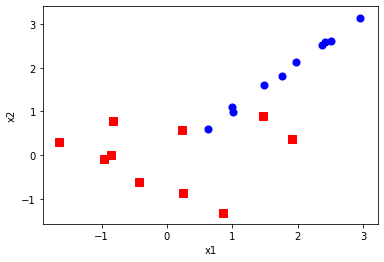

In [36]:
#简单测试
#数据来源：http://www.cnblogs.com/jerrylead/archive/2011/04/18/2020209.html
def test():
    X = [[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1],
         [2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9],
         [1.3, 2.3, 2.1, 0.8, 1.4, 1.2, 2.1, 0.4, 0.7, 2.7]]
    XMat = np.matrix(X).T
    k = 2
    return pca(XMat, k)

#根据数据集data.txt
def main():    
    datafile = "data.txt"
    XMat = loaddata(datafile)
    k = 1
    return pca(XMat, k)
    
if __name__ == "__main__":
    finalData, reconMat = test()
    print(finalData)
    plotBestFit(finalData, reconMat)